<a href="https://colab.research.google.com/github/AureliaWambui19/hypothyroidism-prediction/blob/main/wambui_aurelia_week_8_core_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Treatment with synthetic thyroid hormone is usually simple, safe and effective once you and your doctor find the right dose for you.
 

Hypothyroidism may be due to a number of factors.
        


Although anyone can develop hypothyroidism, you're at an increased risk if you:

- Are a woman

- Are older than 60

- Have a family history of thyroid disease

- Have an autoimmune disease, such as type 1 diabetes or celiac disease

- Have been treated with radioactive iodine or anti-thyroid medications

- Received radiation to your neck or upper chest

- Have had thyroid surgery (partial thyroidectomy)

- Have been pregnant or delivered a baby within the past six months

More details about this condition can be found on sites such as  https://www.mayoclinic.org/diseases-conditions/hypothyroidism/symptoms-causes/syc-20350284



## 1.1.Defining the Research Question

 Building a model that determines whether or not a patient  has hypothyroid.

## 1.2 Metrics for Success

* Accuracy score,the model with the highest accuracy score will be deemed to be the best




## 1.3 The Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism.

The data collected focused on Thyroid patients. 




## 1.4Appropriateness of the available Data

Dataset link: http://bit.ly/hypothyroid_data

The features include:

- Age
- Sex
- on_thyroxine
- query_on_thyroxine
- on_antithyroid_medicationthyroid_surgery
- query_hypothyroid
- query_hyperthyroid
- pregnant
- sick
- tumor
- lithium
- goitre
- TSH_measured 
- TSH
- T3_measured
- T3
- TT4_measured
- TT4


Limitation: The data dictionary was not provided for this  assignment  hence i made two assumptions

the entry y is assumed to be yes, n as no, 
f as false, and t as true

# 2 Data understanding

# 2.1 Importing Libraries

In [195]:
# Here we will import the python Libraries that I will use for analysis in this project

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import metrics


import warnings
warnings.filterwarnings('ignore')

## 2.2 Loading our dataset

In [227]:
#loading dataset


hp = pd.read_csv('hypothyroid.csv')


## 2.3Checking data

In [228]:
# Viewing the the first 6 observations in our dataset

hp.head(6)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.10,y,27,y,1.19,y,23,n,?


In [220]:
# Viewing the last six observations in our dataset
hp.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0,n,0.0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0,n,0.0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0,n,0.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0,n,0.0
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0.0,y,1.8,y,139.0,y,0.97,y,143.0,n,0.0


In [109]:
# Checking the number of rows and columns in the dataset

# Get the number of rows and columns 
rows = len(hp.axes[0]) 
cols = len(hp.axes[1]) 
  
# Print the number of rows and columns 
print("Number of Rows in this dataset is: " + str(rows)) 
print("Number of Columns in this dataset is : " + str(cols)) 


Number of Rows in this dataset is: 3163
Number of Columns in this dataset is : 26


The dataset has 3163 rows and 26 columns

In [110]:
# checking the columns in the dataset

hp.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [111]:
# Checking some summary information about our dataset

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [112]:
# Checking the data types in the dataset

hp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

All the columns in the dataset have object data types including the numerical columns.

i will change them to their correct datatypes

In [113]:
# Checking some summary statistics about our dataset

hp.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


The dataset has special characters (?) This will be handled during data preparation

In [114]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in hp.columns:                              # Iterating through each column in the dataframe
  print(column)                                        # Printing the column name
  print(hp[column].unique())                           # Printing out the unique values in each column
  print(hp[column].nunique())                          # Printing out the number of unique values in each column
  print('') # this separates the results of the output by creating spacing between the various output 

status
['hypothyroid' 'negative']
2

age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
93

sex
['M' 'F' '?']
3

on_thyroxine
['f' 't']
2

query_on_thyroxine
['f' 't']
2

on_antithyroid_medication
['f' 't']
2

thyroid_surgery
['f' 't']
2

query_hypothyroid
['f' 't']
2

query_hyperthyroid
['f' 't']
2

pregnant
['f' 't']
2

sick
['f' 't']
2

tumor
['f' 't']
2

lithium
['f' 't']
2

goitre
['f' 't']
2

TSH_measured
['y' 'n']
2

TSH
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126

 it is noted that the special character ?  appears in the several columns for example the "Sex" column

# 3 Data preparation

## 3.1 Missing Values

In [115]:
# Checking for null values

hp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

there are no null values but we had seen the special character ? in some columns such as the sex column

Hence we need to change that by replacing the ? with null values then impute them.

In [116]:
# Replacing the ? with missing values 

hp = hp.replace(['?'], np.nan)


In [117]:
# Checking the null values after replacing the ? with nan.

hp.isnull().sum().sum()

5329

In [118]:
# Checking the null values after replacing the ? with nan.

hp.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

We now have null values and can now impute them on column basis

In [120]:
# Changing the columns dtypes so that we can impute them
# Creating two lists, 
# A list of categorical columns
# A list of numerical columns

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']
  
numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types respectively

for col in hp.columns:
  if col in numerical_columns:
    hp[col]= pd.to_numeric(hp[col])
  
  else:
   hp[col] = hp[col].astype('category')
    
    
# checking the data types to confirm changes

hp.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

 columns are npw in the right data types

In [121]:
# Filling the missing values in the age column with mean

hp['age']= hp['age'].fillna(hp['age'].mean(), axis = 0)

In [122]:
# Filling the missing values in the sex column with mode

hp['sex']= hp['sex'].fillna(hp['sex'].mode()[0])

In [123]:
# Checking the null values in the measured columns
# Using a for loop and groupby function to confirm our observations

measured = ['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
unit = ['TSH','T3','TT4','T4U','FTI','TBG']

for i,j in zip(measured,unit):
 print(hp.groupby(i)[j].mean())


TSH_measured
n        NaN
y    5.92318
Name: TSH, dtype: float64
T3_measured
n         NaN
y    1.939749
Name: T3, dtype: float64
TT4_measured
n       NaN
y    108.85
Name: TT4, dtype: float64
T4U_measured
n         NaN
y    0.978199
Name: T4U, dtype: float64
FTI_measured
n           NaN
y    115.397771
Name: FTI, dtype: float64
TBG_measured
n          NaN
y    31.283077
Name: TBG, dtype: float64


We see that in instances where the tests were not measured, there are null values because the tests were not taken,

hence the entry should be zero which we will use to fillna

In [124]:
# filling the measured columns with 0
measured = ['TSH','T3','TT4','T4U','FTI','TBG']

hp[measured] =hp[measured].fillna(0)


In [125]:
hp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

## 3.1 Duplicates

In [126]:
# checking for duplicates
hp.duplicated().sum()

77

There are 77 duplicated columns and we will drop them.

In [127]:
# Dropping for duplicates 

hp.drop_duplicates(inplace = True)

# Cconfriming that we no longer have duplicates

hp.duplicated().sum()

0

## 3.3 Outliers


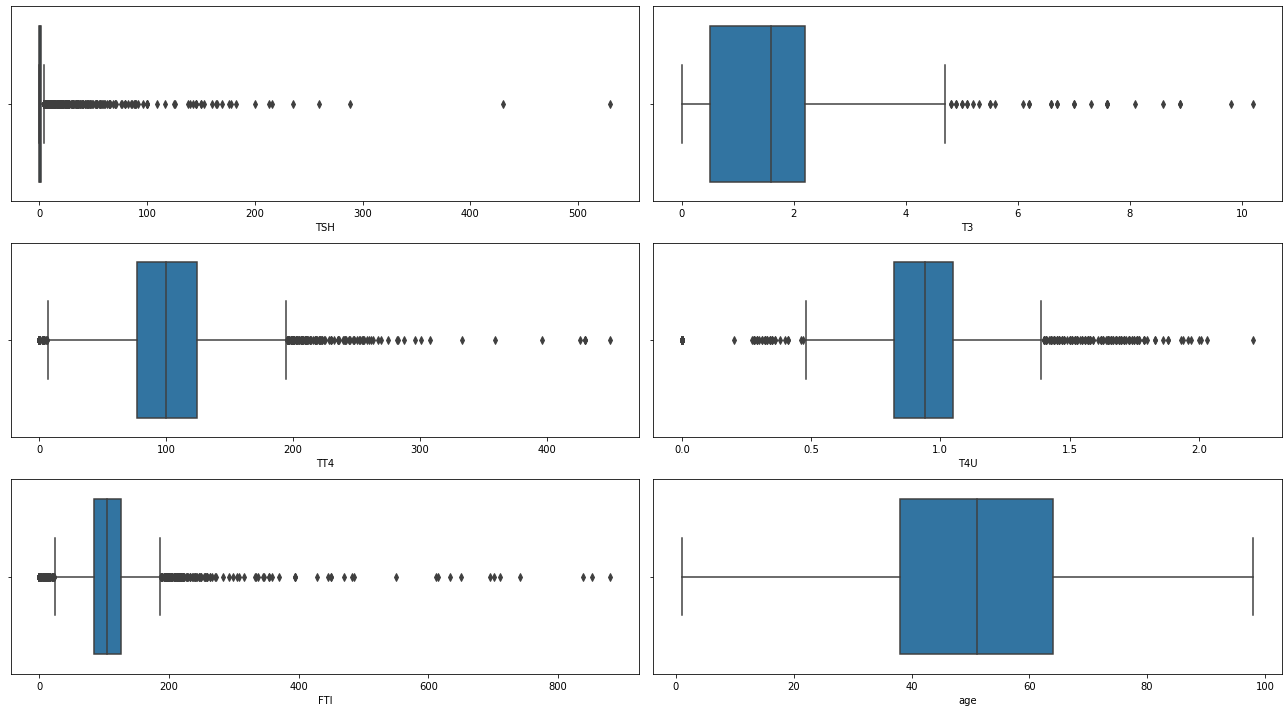

In [221]:
# using boxplots to display outliers
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6))  = plt.subplots(3,2, figsize=(18, 10))

sns.boxplot(hp['TSH'], ax=ax1)
sns.boxplot(hp['T3'], ax=ax2)
sns.boxplot(hp['TT4'], ax=ax3)
sns.boxplot(hp['T4U'], ax=ax4)
sns.boxplot(hp['FTI'], ax=ax5)
sns.boxplot(hp['age'], ax=ax6)
plt.tight_layout()
plt.show()

From the boxplots above ,only age doesnt have outliers
the outliers will not be dropped so as not to affect the dataset

# 4 EDA

## 4.1 Univariate Analysis

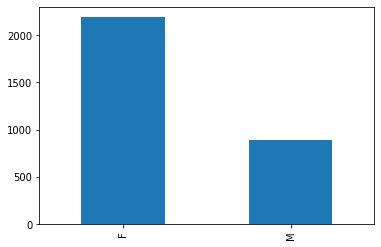

In [130]:
hp['sex'].value_counts().plot(kind='bar')

Most patients who took part in the clinical camp to test for hypothyroidism were females

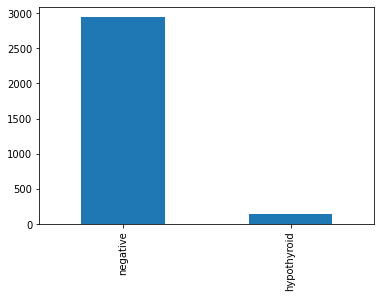

In [131]:
hp['status'].value_counts().plot(kind='bar')

Most people didnt have hypothyrid

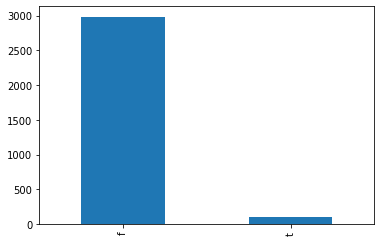

In [132]:
hp['thyroid_surgery'].value_counts().plot(kind='bar')

most patients had not gone through a thyroid surgery

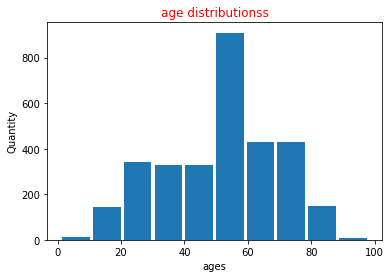

In [133]:
# A histogram of the age column
h=hp['age']

plt.hist(h, histtype='bar', bins=10,rwidth=0.9)
plt.xlabel('ages')
plt.ylabel('Quantity')
plt.title('age distributionss',color='red')
plt.show()



From the Histogram, the distribution of age is close to a normal distribution.

It is also visible that most respondents were in their 60's;  which is the tallest bin.


## 4.2 Bivariate Analysis

In [134]:
# Correlation
# This is the association between numerical variables in the dataset
# Computing the correlation matrix 

hp.corr()

# for better interpretation we will a heatmap; a visual.

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,0.011431,-0.074543,-0.000089,-0.024815,0.074604,-0.132861
TSH,0.011431,1.000000,-0.083445,-0.219696,0.096258,-0.183648,-0.050415
T3,-0.074543,-0.083445,1.000000,0.493887,0.455964,0.326356,-0.300469
TT4,-0.000089,-0.219696,0.493887,1.000000,0.600486,0.758395,-0.441241
T4U,-0.024815,0.096258,0.455964,0.600486,1.000000,0.196093,-0.612819
FTI,0.074604,-0.183648,0.326356,0.758395,0.196093,1.000000,-0.384513
TBG,-0.132861,-0.050415,-0.300469,-0.441241,-0.612819,-0.384513,1.000000


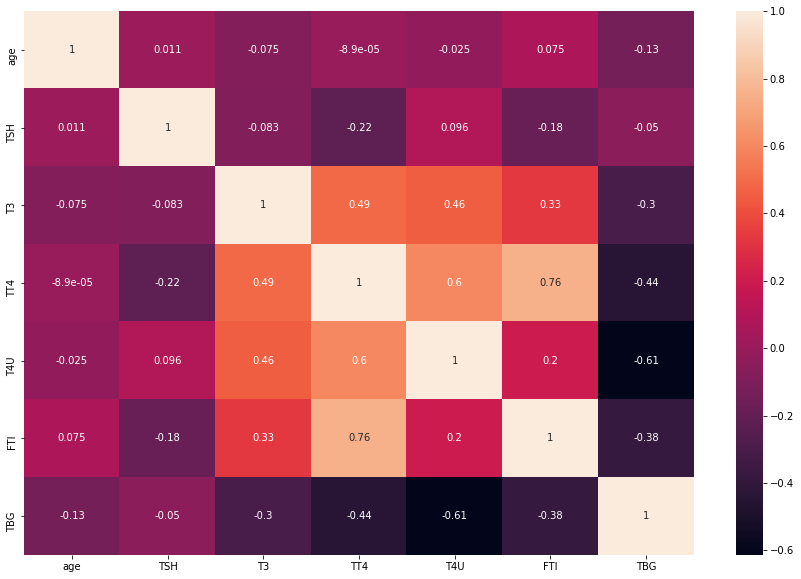

In [135]:
# Ploting a heatmat
 

plt.subplots(figsize=(15,10))
sns.heatmap(hp.corr(),annot=True)


The strongly correlated variables include: T4U and TT4; FTI and TT4.(positive correlation) 0.6 and 0.76 respectively



#  5 Modelling

## PART 1

## 5.1 Random Forest

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging.

The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees



In [205]:
# To create our model, we first split our data:

# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
 
# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators =120, random_state=20, min_samples_split=8, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred) *100

98.92008639308855

The model is 98.92% accurate.

This model is too good. It could be overfitting.

In [198]:
# Hyperparameter tuning the RandomForestClassifier


from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [50, 60, 70, 80], 'min_samples_split':[2,3,4,5,6 ], 'max_depth' : [3,4, 5, 8, 10]}

forest = RandomForestClassifier()

search = GridSearchCV(forest, scoring = 'accuracy', param_grid=params, cv = 10)

search.fit(X, y)

search.best_params_


{'max_depth': 10, 'min_samples_split': 3, 'n_estimators': 70}

In [206]:
# Fitting the best parameters to the model and observe the performance

forest = RandomForestClassifier(n_estimators =70, criterion = 'entropy', max_depth = 10, min_samples_split = 3)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)


# Evaluating the model performance
print("Accuracy:", metrics.accuracy_score(y_test, y_pred) *100)

Accuracy: 99.35205183585313


Accuracy increased after fitting with the best parameterrs from 98.92 to 99.35%

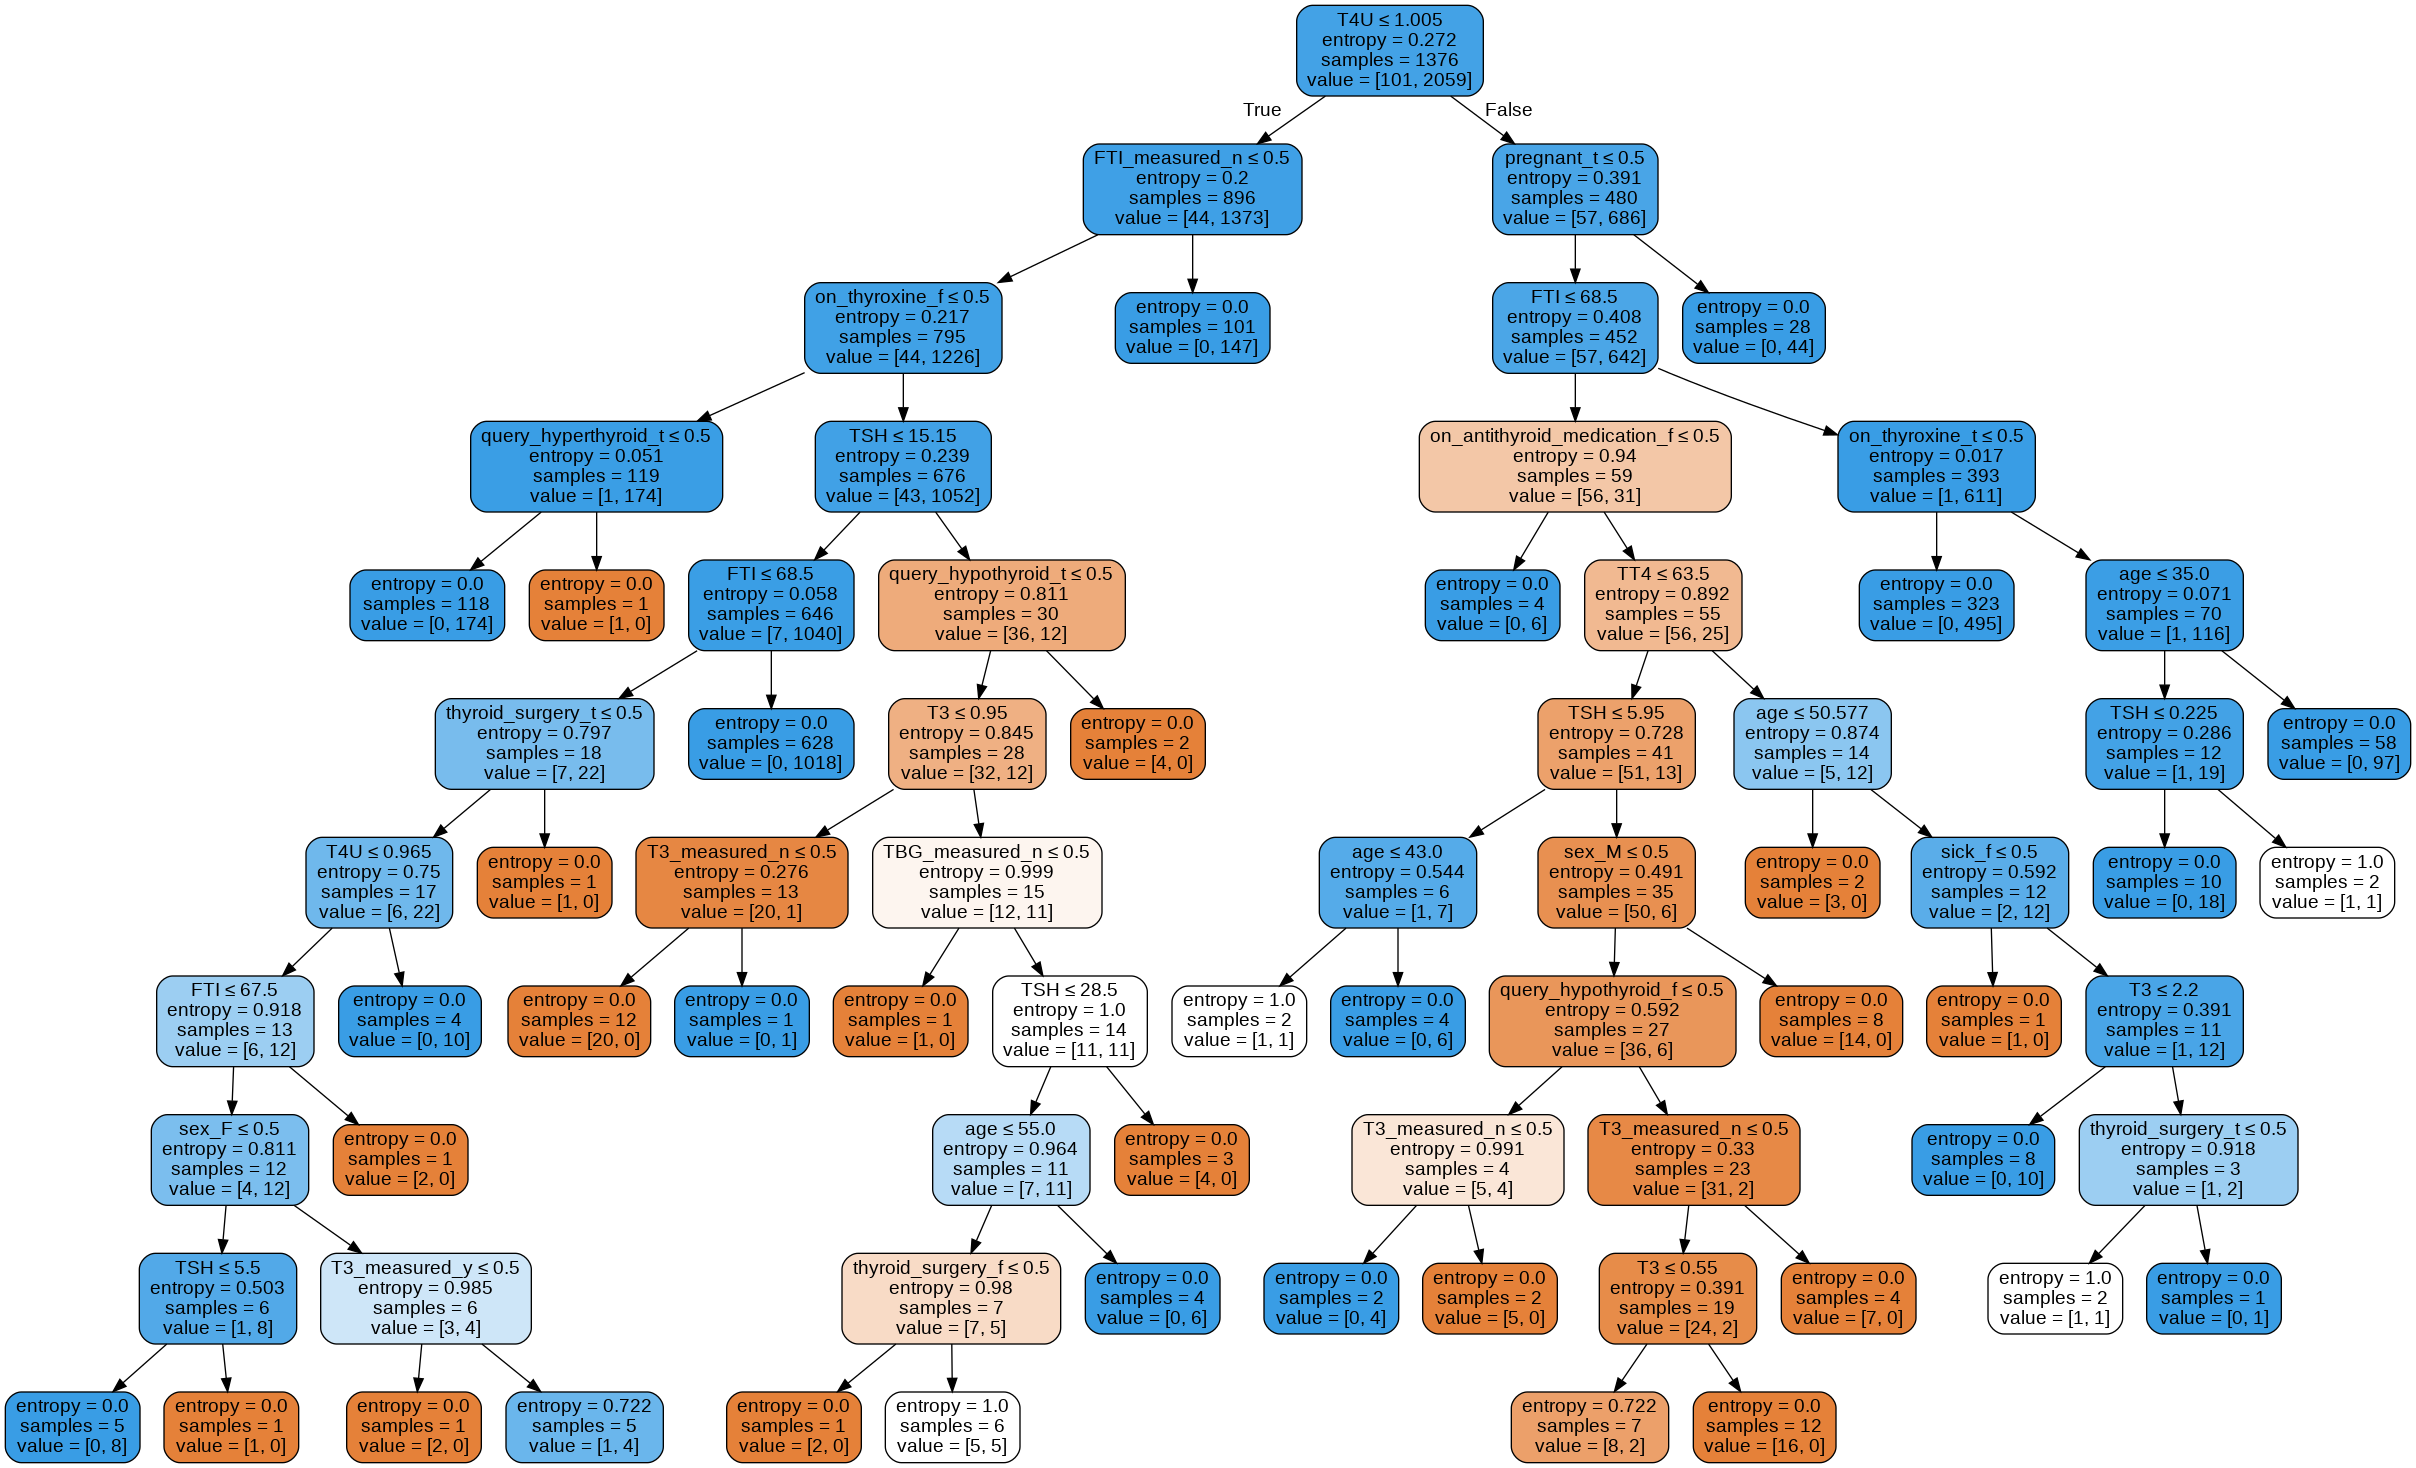

In [143]:
# Visualizing tree number 40

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picking a specific tree from the forest; tree  number 40
tree = forest.estimators_[40]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Hypothyroid_Test.png')
Image(graph.create_png())

In [207]:
# Feature importance

# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

# printing feature inportances
print(feature_importances) 
print()

# Sorting the values in descending order, since we want to see the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:16} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.03), ('TSH', 0.34), ('T3', 0.02), ('TT4', 0.02), ('T4U', 0.04), ('FTI', 0.42), ('TBG', 0.0), ('sex_F', 0.0), ('sex_M', 0.0), ('on_thyroxine_f', 0.01), ('on_thyroxine_t', 0.0), ('query_on_thyroxine_f', 0.0), ('query_on_thyroxine_t', 0.0), ('on_antithyroid_medication_f', 0.02), ('on_antithyroid_medication_t', 0.0), ('thyroid_surgery_f', 0.0), ('thyroid_surgery_t', 0.01), ('query_hypothyroid_f', 0.01), ('query_hypothyroid_t', 0.0), ('query_hyperthyroid_f', 0.0), ('query_hyperthyroid_t', 0.02), ('pregnant_f', 0.0), ('pregnant_t', 0.01), ('sick_f', 0.01), ('sick_t', 0.0), ('tumor_f', 0.0), ('tumor_t', 0.0), ('lithium_f', 0.0), ('lithium_t', 0.0), ('goitre_f', 0.0), ('goitre_t', 0.0), ('TSH_measured_n', 0.0), ('TSH_measured_y', 0.0), ('T3_measured_n', 0.03), ('T3_measured_y', 0.01), ('TT4_measured_n', 0.0), ('TT4_measured_y', 0.0), ('T4U_measured_n', 0.0), ('T4U_measured_y', 0.0), ('FTI_measured_n', 0.01), ('FTI_measured_y', 0.0), ('TBG_measured_n', 0.0), ('TBG_measured_y', 0.0)]


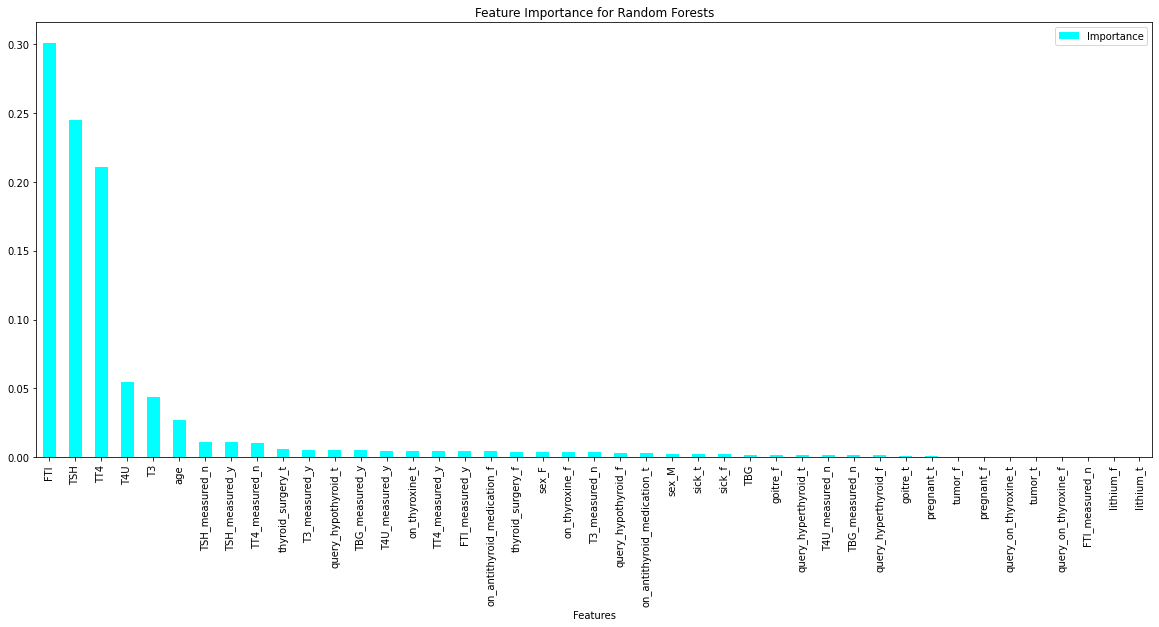

In [208]:
# Getting the feature importance

pd.DataFrame({'Features' : X.columns, 'Importance' : forest.feature_importances_})\
.sort_values(by = 'Importance', ascending = False).set_index('Features')\
.plot.bar(title = 'Feature Importance for Random Forests',figsize = (20, 8), color = 'cyan')
plt.show()

The plot shows the most important features in predicting whether a person is hypothyroid or not.

* the most 6 import features are FTI,TSH,TT4 ,T4U,T3 and age respectively


In [209]:
# Using the FTI feature only to build a prediction model

# Splitting the data into Features set and Labels

X= hp.FTI.values.reshape(-1,1)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets   

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


# Fitting the model, making predictions and evaluating the model

forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split=10, max_depth=5)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

accuracy_score(y_test, y_pred) *100

98.27213822894169

The model yeilds 98.27 accuracy using the most important feature FTI.

This is lower compared to the model with all other features which was 98.92

##5.2 Ada Boost Classifier

AdaBoost, short for Adaptive Boosting.

AdaBoost rarely suffers from overfitting problems in low noise data cases.
 

In [210]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

adc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=200)
                         

adc = adc.fit(X_train, y_train)

y_pred = adc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9935205183585313

The Ada Boost Classifier yielded 99.35% accuracy higher than random forest

Still the model is too good and seems like overfitting

In [211]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
adaf = pd.DataFrame({'feature': X.columns, 'importance': adc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
adaf

,importance
feature,
FTI,1.584477e-01
TSH,1.577364e-01
age,1.492982e-01
T3,1.425822e-01
T4U,1.418026e-01
TT4,1.214472e-01
on_thyroxine_t,2.009741e-02
thyroid_surgery_f,1.529183e-02
on_thyroxine_f,1.120673e-02


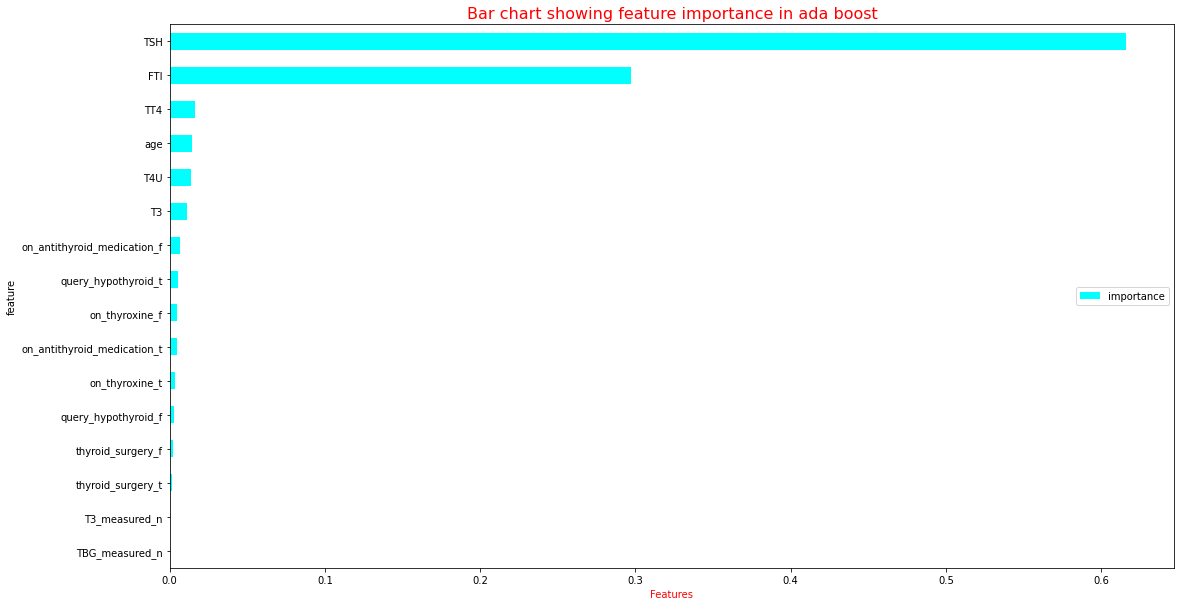

In [229]:
# Creating a bar chart of feature importance in descending order
#
adaf= adaf[:16].sort_values(by = 'importance', ascending = True)
adaf.plot(kind = 'barh', figsize = (18, 10), color = 'cyan')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance in ada boost', color = 'red', fontsize = 16)
plt.xlabel('Features', fontsize = 10, color = 'red')
plt.show()

The 6  most important features are FTI,TSH,age,FTI,T3.T4U and TT4...a difference in  the order of importane in features is noted in comparison to random forest

## 5.3 Gradient boosting

In [213]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

gbc = GradientBoostingClassifier(n_estimators= 200, learning_rate=0.1, max_depth=3, 
                                 min_samples_split=10)
# Fitting the model, making predictions and evaluating the model
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)

accuracy_score(y_test, y_pred_gbc)

0.9946004319654428

accuracy is 99.46 ...which is the highest compared to random forest and ada boost

In [215]:
# Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
gbcf = pd.DataFrame({'feature': X.columns, 'importance': gbc.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
gbcf

,importance
feature,
TSH,0.616214
FTI,0.296871
TT4,0.016237
age,0.014199
T4U,0.013645
T3,0.011338
on_antithyroid_medication_f,0.006479
query_hypothyroid_t,0.005399
on_thyroxine_f,0.004868


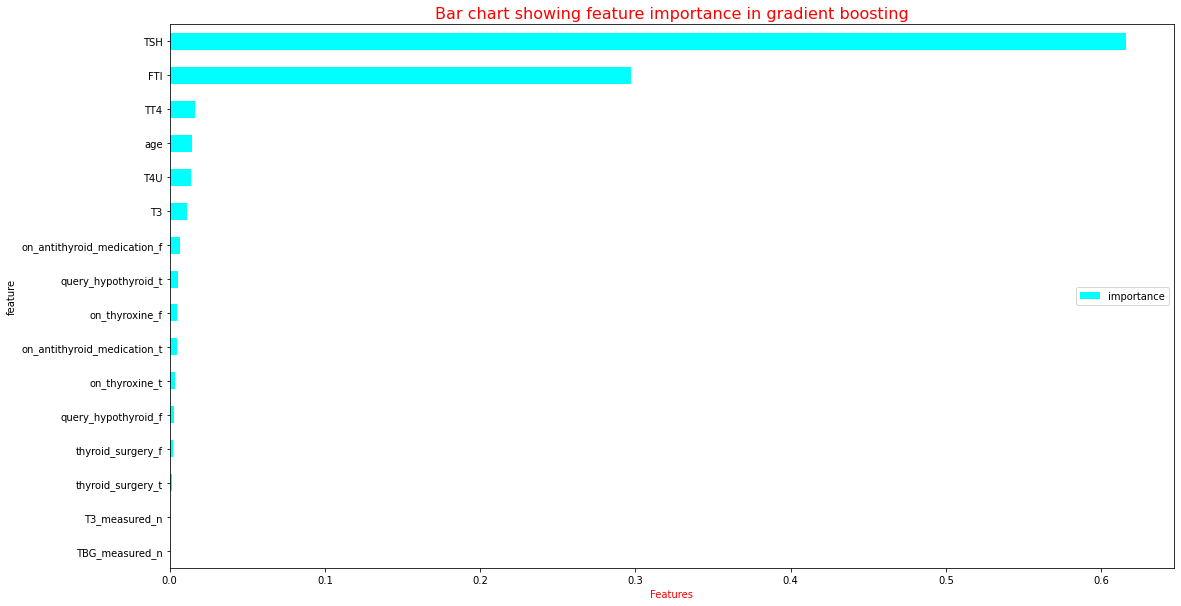

In [230]:
# Creating a bar chart of feature importance in descending order
#
gbcf= adaf[:16].sort_values(by = 'importance', ascending = True)
gbcf.plot(kind = 'barh', figsize = (18, 10), color = 'cyan')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance in gradient boosting', color = 'red', fontsize = 16)
plt.xlabel('Features', fontsize = 10, color = 'red')
plt.show()

the top 6 most important features are TSH,FTI,TT4,AGE,T4U,T3

## PART 2

## 5,4Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. 

In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.



Creating SVC using different kernels

Using Linear kernel

In [179]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model
svc = SVC(kernel = 'linear',  C = 2, gamma = 0.04)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9892008639308856

The SVC model using linear kernel yielded 98.92% accuracy.

Using a polynomial kernel

In [180]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'poly', C = 2, gamma = 0.04)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9730021598272138

The SVC model using polynomial kernel yielded 97.30% accuracy.

This is slightly lower compared to the model using a linear kernel.

Using rbf kernel

In [181]:
# Splitting the data into Features set and Labels

X= hp.drop('status', axis = 1)


# Getting dummies for the feature sets
# Most are categorical and need to be in numerical before training

X = pd.get_dummies(X)

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'rbf', C = 2, gamma = 0.04)

svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9568034557235421

The SVC model using radial basis funtion (rbf) kernel yielded 95.68% accuracy.

This is the lowest accuracy compared to the other two kernels.

##5.5Tuning Support Vector Classifier

In [182]:
#e linear kernel perform best for this partical classification problem.

# Here we will use Randomized search to find the best parameters for the model

# Creating a dictionary
# Specifying the parameters we want to tune

params = {'C': [2, 3,-1,0],
          'gamma': [0.04, 0.01, 0.1, -1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 3, 'gamma': 0.01}

the best paratmeters are when gamma is 3 and gamma is 0.01

Visualizations

* Using two variables only: FT1 and TT4 from feature importances by ada boost 

In [193]:
# Splitting the data into Features set and Labels


X= hp[['FTI','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

svc = SVC(kernel = 'linear', C =3, gamma = 0.01)

svc = svc.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9578833693304536

accuracy is 95.78%

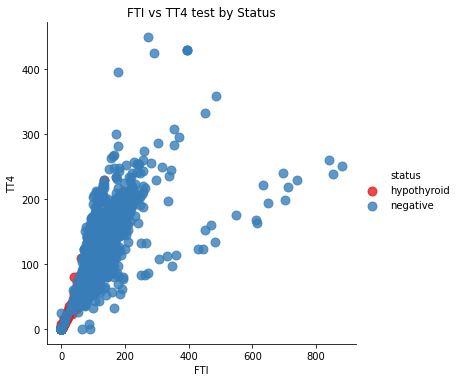

In [222]:
# Plotting our desired features
# Using lmplot and seaborn 
# Displaying the chart

sns.lmplot('FTI','TT4', data=hp, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 80})
plt.title('FTI vs TT4 test by Status')
plt.show()

The plot shows the two important features of interest: FTI vs TT4 and how they distingusish hyperthyroid.



# 6Challenging the Solution

##6.1Fitting SVC model with Sigmoid function

I will try the results using another kernel in SVC classifier; sigmoid.

The sigmoid function returns 0 and 1 hence its the best for binary classification.

In [192]:
# Splitting the data into Features set and Labels

X= hp[['FTI','TT4']].values

# Encoding the target variable from strings to numericals
           
y = hp.status.cat.codes

# Splitting the data again into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'sigmoid', C = 3, gamma = 0.01)

svc = svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)


0.9578833693304536

Using Sigmoid the model yielded 95.78% accuracy.

This is similar compared to the linearl kernel using the same two features.

# 7 Conclusion

 The best performing kernel in the SupportVectorClassifier is Linear with an accuracy score 98.92% 

among  random forest ,Ada Boost Classifier,svc  and gradient boost the best of the three was gradient boosting  with 99.46% accuracy

Feature importance order is different in random forest,adaboost classifier and gradient boost models









